# Project: Is faster music happier?
##### Student: Will Lawrence
##### Student Number: 30180146

# Problem:

Are songs with a faster tempo (i.e. higher beats per minute) more happy? In this program, I will use a dataset of 2000+ songs from Spotify and I will analyze how positive (i.e. happy, cheerful, upbeat) a list of songs created by inputting a tempo really are. That is, given a tempo (in beats per minute), this program will plot the valences (a measure from 0.0 to 1.0 describing musical positiveness) in a scatter plot of a list of songs with tempos greater than or equal to the input.


# Part 1

  
## 1 A. The information in my chosen data set, "spotifydata.csv" is:

1. song_title (str) - The title of the song

2. artist (str) - The name of the artist that performs the song

3. acousticness (float) - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

4. danceability (float) - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

5. duration_ms (int) - The duration of the track in milliseconds.

6. energy (float) - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

7. instrumentalness	 (float) - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

8. key (int) - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

9. liveness (float) - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

10. loudness (float) - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

11. mode (int) - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

12. speechiness (float)	- Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

13. tempo (float) - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

14. time_signature (int) - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

15. valence (float) - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

16. target (int) - A dummy variable for whether or not the dataset creator likes the song

## 1 B. Write a description of what your program will produce

#### Chosen output: Given a filename and a tempo (0.0...), return a scatter plot of the valences of up to 25 songs that have a tempo greater than or equal to the inputted tempo

Other potential outputs
1. The top song for a given sound quality (like tempo).
2. The average valence of a list of songs
3. A list of song names that meet a set of qualities

## 1 C. Write or draw examples of what your program will produce


expect(tempo_valence_plot(("spotifydata.csv", 120), 

Valence  |      o               o       o
[0.0,1.0]|                 
         |                 
         |                
         |               
         |           
         |          
         |              o
         |             
         |_____________________________________
            MaskOff  Redbone  Char  Hercules
           Songs with Tempo Greater than Input
      )

expect(tempo_valence_plot("spotifydata.csv", 154), 

Valence  |       o                 o
[0.0,1.0]|                    
         |                      
         |                       
         |                        
         |                         
         |                          
         |                          
         |                 o                o
         |___________________________________________________
            Look Alive  OOOUU  Coming  I Know There's
                                Home    Gonna Be (Good Times)
                Songs with Tempo Greater than Input
      )

expect(tempo_valence_plot("spotifydata.csv", 400), 
       
Valence  |      
[0.0,1.0]|      
         |       
         |         
         |          
         |        
         |          
         |         
         |             
         |_____________________________________
           Songs with Tempo Greater than Input
     )

# Part 2 

## 2 A. Design data definitions

For my data definition, I know that I will need to create a compound data type for an individual song because a song has multiple pieces of information to describe it. In terms of what information I will choose to store about a song, I will store the data that I think is most crucial for differentiating songs: 

- 'title' 
- 'artist'
- 'acousticness'
- 'danceability'
- 'tempo'
- 'valence'

Artist and Title are both strings that are important for categorizing a song with familiar terms. Acousticness and danceability are measures that allow my program to be extended in the future to check for other qualities. Tempo is important in determining which songs to plot. Valence is the most important measure as it is what I will be using to answer my main question and plot values of song positivity. 

I will also need to create a list of songs as an arbitrary sized data type. This will be the data type that my read function outputs and my analyze function takes as an input.

Lastly, I will need to define a list of strings and a list of floats. The list of strings will be necessary when adding labels to my X axis to have song titles appear. The list of floats will be necessary when I will plot the valence as a Y axis for my plot.

In [7]:
# Setup
from cs103 import *
from typing import NamedTuple, List
import matplotlib.pyplot as pyplot
import csv

# Step 2a: Design data definitions

Song = NamedTuple('Song', [('title', str),             # song title
                           ('artist', str),            # artist who performs the song
                           ('acousticness', float),    # Confidence that song is acoustic [0.0,1.0] determined by Spotify
                           ('danceability', float),    # Confidence that song is danceable [0.0,1.0] determined by Spotify
                           ('tempo', float),           # Estimated tempo of a track in beats per minute (BPM) (0.0, )
                           ('valence', float)])        # Estimated musical positiveness conveyed by a track [0.0,1.0] determined by Spotify

# interp. A song with its associated title, artist, acoustincness (A confidence measure from 0.0 to 1.0 of whether the 
# track is acoustic), danceability (where 0.0 is least danceable and 1.0 is most danceable), tempo (in beats
# per minute), and valence (A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track)

S0 = Song('Redbone', 'Childish Gambino', 0.199, 0.743, 160.083, 0.588)
S1 = Song('Them Changes (feat. Flying Lotus & Kamasi Washington)', 'Thundercat', 0.555, 0.791, 81.678, 0.733)
S2 = Song('World In Motion', 'New Order', 0.0239, 0.603, 123.922, 0.773)
 
def fn_for_song(s: Song) -> ...:   # template based on compound
    return...(s.title,             # str
              s.artist,            # str
              s.acousticness,      # float [0.0,1.0]
              s.danceability,      # float [0.0,1.0]
              s.tempo,             # float (0.0...)
              s.valence)           # float [0.0,1.0]

# List[Song]
# interp. a list of Songs

LOS0 = []
LOS1 = [S0, S1]
LOS2 = [S0, S1, S2]

def fn_for_los(los: List[Song]) -> ...: # template from Arbitrary Sized Data and the reference rule
    # acc description
    acc = ...      # type: ...
    for s in los:
        ...(acc, fn_for_song(s))
        
    return acc

# List[str]
# interp. a list of strings

L0 = []
L1 = ["Jumpman", "Stronger", "Sweet Home Alabama"]

def fn_for_lost(lost: List[str]) -> ...: # template from Arbitrary Sized Data
    # acc description
    acc = ...      # type: ...
    for st in lost:
        ...(acc, st)

    return acc

# List[float]
# interp. a list of floats

LOF0 = []
LOF1 = [0.0,1.1,2.3,3.5,44.3,3.5,6.0]

def fn_for_lof(lof: List[float]) -> ...:  # template from Arbitrary Sized Data
    # acc description
    acc = ...      # type: ...
    for f in lof:
        ...(acc, f)

    return acc

# List[int]
# interp. a list of integers

LOI0 = []
LOI1 = [0,1,2,3]

def fn_for_loi(loi: List[int]) -> ...:  # template from Arbitrary Sized Data
    # acc description
    acc = ...      # type: ...
    for i in loi:
        ...(acc, i)

    return acc


## 2 B. Design a function to read the information and store it as data in your program

In [8]:
def read(filename: str) -> List[Song]:
    """    
    reads information from the specified csv file and returns a list of songs (a user-defined compound data type) 
    with associated title, artist, acoustincness [0.0,1.0], danceability [0.0,1.0], tempo ((0.0...) in beats 
    per minute), and valence [0.0,1.0]
    """
    # return []
    # template from HtDAP
    # acc contains the result so far
    acc = [] # type: List[Song]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile, delimiter=',')
        next(reader) # skip header line

        for row in reader:
            s = Song(row[0], row[1], parse_float(row[2]), parse_float(row[3]), parse_float(row[12]), parse_float(row[14]))
            acc.append(s)
        
        return acc

# Begin testing
start_testing()

# Examples for read

expect(read('spotifydata_test1.csv'), [('Mask Off', 'Future', 0.0102, 0.833, 150.062, 0.286), 
                                       ('Redbone', 'Childish Gambino', 0.199, 0.743, 160.083, 0.588)])
expect(read('spotifydata_test2.csv'), [('World In Motion', 'New Order', 0.0239, 0.603, 123.922, 0.773),
                                       ('One Nation Under a Groove', 'Funkadelic', 0.233, 0.789, 122.415, 0.842),
                                       ('Bouncin', 'Chief Keef', 0.314, 0.713, 140.061, 0.783)])
# show testing summary
summary()

2 of 2 tests passed


## 2C. Design Functions to Analyze the Data

My function will need the following helper functions:

1. Check if a songs' tempo is greater than or equal to the inputted tempo (check_tempo)
2. Compile a list of songs that have tempos that are greater than or equal to the inputted tempo (create_song_list)
3. Extract a list of valences from a given List[Song] (list_valences)
4. Extract a list of song titles from a given List[Song] (list_titles)
5. If a list is greater than 25 songs, shorten the list to 25 songs (shorten_list_25)
6. Create a list of n ascending integers (ex. [0,1,2,3,4,5,6]) where n is the number of songs in the inputted list
7. Plot the valences of a list of songs

Finally, I will need a main function that plots the valences of up to 25 songs that have tempos greater than or equal to the inputted tempo from a csv file
    

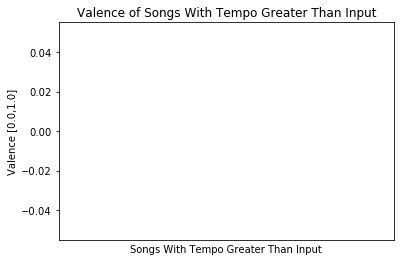

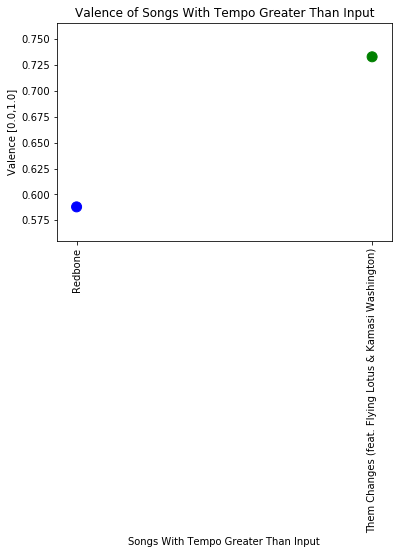

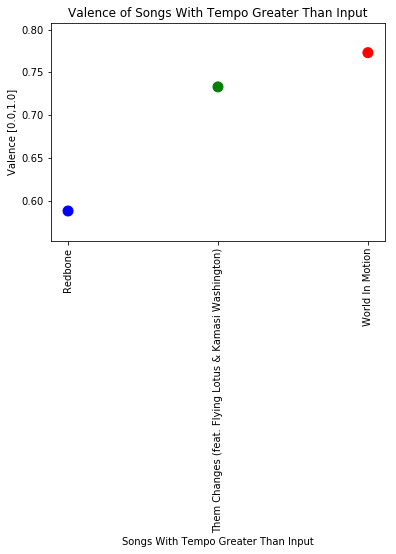

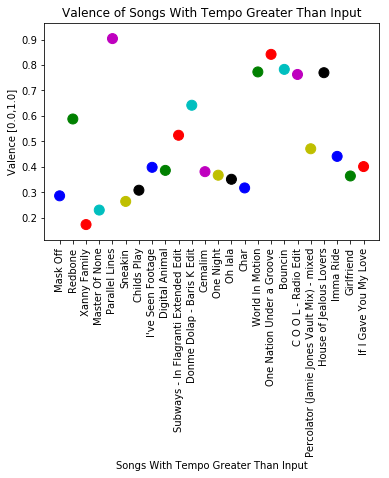

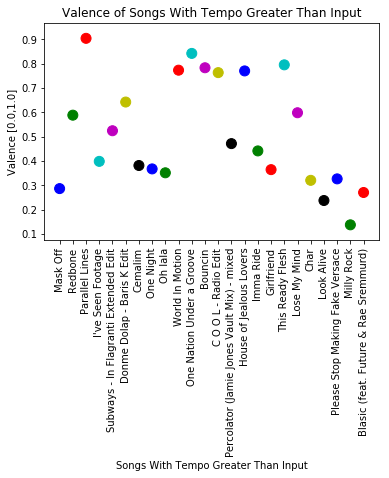

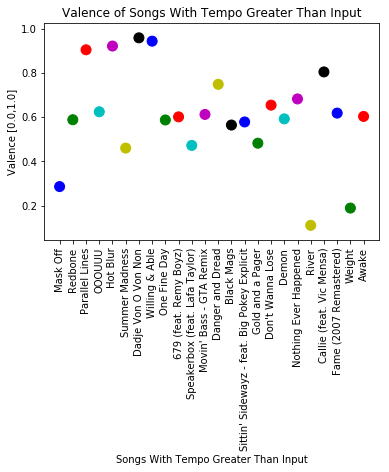

24 of 24 tests passed


In [9]:
def check_tempo(s: Song, t: float) -> bool:
    '''
    Return True if the inputted song's tempo (s.tempo) is greater than or equal to the inputted float (0.0...)in beats
    per minute (BPM)
    '''
    # return True        # Body of Stub
    # Template from Song with one additional input
    if s.tempo >= t:
        return True
    else:
        return False

def create_song_list(los: List[Song], t: float) -> List[Song]:
    '''
    Given a list of songs, return a list of songs that have a tempo (s.tempo) greater than or equal to the 
    inputted floats for tempo (t)
    '''
    # return []  # body of stub
    # template from List[Song] with one other float input
    # acc stores songs that meet the criteria so far
    acc = []      # type: List[Song]
    for s in los:
        if check_tempo(s, t)== True:
            acc.append(s)
        else:
            acc
    return acc

def list_valence(los: List[Song]) -> List[float]:
    '''
    Given a list of Songs, extract a list of the songs valences
    ''' 
    # return []  # Body of Stub
    # template from List[Song]
    # valences stores songs' valences so far
    valences = []      # type: List[float]
    for s in los:
            valences.append(s.valence)
    return valences
    
def list_title(los: List[Song]) -> List[str]:
    '''
    Given a list of Songs, extract a list of the songs titles
    ''' 
    # return []  # Body of Stub
    # template from List[Song]
    # titles stores song names so far
    titles = []      # type: List[str]
    for s in los:
        titles.append(s.title)
    return titles

def shorten_list_25(los: List[Song]) -> List[Song]:
    '''
    Given a list of songs, take the first 25 Songs into a new list
    '''
    # return []    # Body of the stub
    # template based on a call to a primitive list operator
    return los[:24]

def ascending_int_list(los: List[Song]) -> List[int]:
    '''
    Given a list of songs, create a list of n ascending integers (ex. [0,1,2,3,4,5,6]) where n is the number of songs
    in the inputted list
    '''
    # return []    # Body of the stub
    # template based on a call to a primitive list operator
    return list(range(len(los)))

def plot_valence_song(los: List[Song]) -> None:
    """
    Display a scatter plot of 25 songs with their corresponding titles (x axis) and valences (y axis)
    """
    # return None # body of the stub
    # template based on Visualization Module
    
    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('Songs With Tempo Greater Than Input')
    pyplot.ylabel('Valence [0.0,1.0]')
    pyplot.title('Valence of Songs With Tempo Greater Than Input')
    
    # If list is longer than 25 songs, shorten list of songs to 25
    songs = shorten_list_25(los)
    
    # plot our data 
    
    scatter = pyplot.scatter(ascending_int_list(songs), list_valence(songs), marker="o", s=100, color=('b', 'g', 'r', 'c', 'm', 'y', 'k'))
    
    # Set titles as labels on the x axis
    pyplot.xticks(ascending_int_list(songs), list_title(songs), rotation='vertical')
    
    # show the plot
    pyplot.show()
    
    return None

def tempo_valence_plot(filename: str, tempo: float) -> None:
    '''
    Given a filename and a tempo (0.0...), return a scatter plot of the valences of up to 25 songs that have a tempo 
    greater than or equal to the inputted tempo

    '''
    # return None    # Body of the Stub
    # template based on function composition
    return plot_valence_song(create_song_list(read(filename), tempo))

#Begin Testing
start_testing()

# Examples for check_tempo
expect(check_tempo(S0, 300), False)
expect(check_tempo(S1, 100), False)
expect(check_tempo(S0, 100), True)

# Examples for create_song_list
expect(create_song_list(LOS0, 100), [])
expect(create_song_list(LOS1, 100), [S0])
expect(create_song_list(LOS2, 100), [S0, S2])

# Examples for list_valence
expect(list_valence(LOS0), [])
expect(list_valence(LOS1), [0.588, 0.733])
expect(list_valence(LOS2), [0.588, 0.733, 0.773])

# Examples for list_title
expect(list_title(LOS0), [])
expect(list_title(LOS1), ["Redbone", "Them Changes (feat. Flying Lotus & Kamasi Washington)"])
expect(list_title(LOS2), ["Redbone", "Them Changes (feat. Flying Lotus & Kamasi Washington)", "World In Motion"])

# Examples for shorten_list 25
expect(shorten_list_25(LOS0), [])
expect(shorten_list_25(LOS1), [S0, S1])
expect(shorten_list_25(LOS2), [S0, S1, S2])

# Examples for ascending_int_list
expect(ascending_int_list(LOS0), [])
expect(ascending_int_list(LOS1), [0,1])
expect(ascending_int_list(LOS2), [0,1,2])

# Examples for plot_valence_song
expect(plot_valence_song(LOS0), None)
expect(plot_valence_song(LOS1), None)
expect(plot_valence_song(LOS2), None)

# Examples for tempo_valence_plot
expect(tempo_valence_plot('spotifydata.csv', 10), None)
expect(tempo_valence_plot('spotifydata.csv', 100), None)
expect(tempo_valence_plot('spotifydata.csv', 150), None)

summary()